<a href="https://colab.research.google.com/github/zia207/R_Beginner/blob/main/Notebook/01_04_02_data_visualization_ggplot_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# Advanced Plotting with ggplot2 {.unnumbered}

`ggplot2` is a powerful and elegant data visualization package for R, part of the `tidyverse`. It's based on the "Grammar of Graphics," a systematic way of building plots layer by layer. This approach makes `ggplot2` incredibly flexible and consistent.



## Installation and Loading

First, if you haven't already, you'll need to install `ggplot2`.

``` r
install.packages("ggplot2")
```

Then, load the library every time you start a new R session where you want to use it.

```{R}
library(ggplot2)
```

We'll also often use the `dplyr` package for data manipulation, so let's load that too.

```{R}
library(dplyr)
```


## The Grammar of Graphics: Key Components

Every `ggplot2` plot is built using these core components:

1.  **Data:** The dataset you want to visualize.
2.  **Aesthetics (aes):** How variables in your data are mapped to visual properties of the plot (e.g., x-axis, y-axis, color, size, shape).
3.  **Geoms (geometric objects):** The visual marks you use to represent data points (e.g., points, lines, bars, boxes).
4.  **Facets:** Splitting your plot into multiple subplots based on categorical variables.
5.  **Stats (statistical transformations):** Computing new variables for plotting (e.g., counting observations for bar charts).
6.  **Scales:** Controlling the mapping from data values to aesthetic values (e.g., setting axis limits, defining color palettes).
7.  **Coordinate Systems:** How data is mapped to the 2D plane (e.g., Cartesian, polar).
8.  **Themes:** Controlling non-data ink elements like titles, fonts, and background colors.


## Setup R in Python Runtype - Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316568 sha256=32fadacfb4bb5ef3bb5512b5242b04a6305b31ccbbbb004bafaedb932aec7620
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and Install Required R Packages

In [3]:
%%R
packages <- c(
          'ggplot2',
          'dplyr'
)

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

## Load Packages

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [5]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:dplyr"     "package:ggplot2"   "package:tools"    
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "package:base"     


## Basic Plotting

### Scatter Plots

Let's start with a simple scatter plot using the built-in `mtcars` dataset, which contains information about various car models.


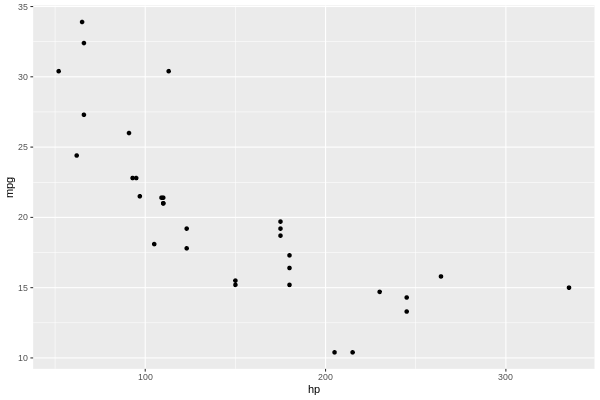

In [6]:
%%R -w 600 -h 400
# Load the dataset (it's already available in R)
data(mtcars)

# Basic scatter plot: mpg vs. hp
ggplot(data = mtcars, aes(x = hp, y = mpg)) +
  geom_point()

-   `ggplot()` initializes the plot and specifies the `data` and global `aes` mappings.
-   `aes(x = disp, y = mpg)` tells `ggplot` to map the `disp` column to the x-axis and `mpg` to the y-axis.
-   `geom_point()` adds a layer of points, creating a scatter plot. The `+` operator is used to add layers.

### Adding More Aesthetics

We can map other variables to visual aesthetics like `color`, `size`, or `shape`. Let's map `cyl` (number of cylinders) to `color`.

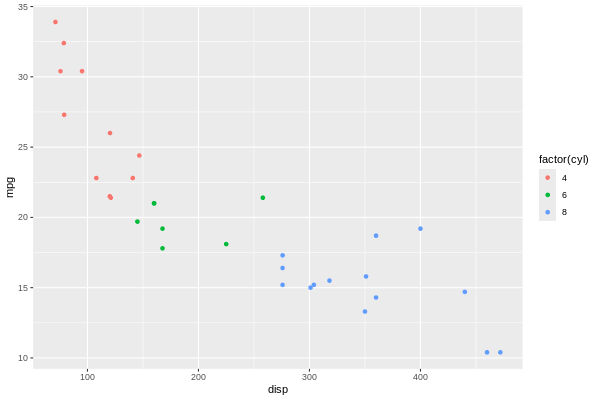

In [7]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = disp, y = mpg, color = factor(cyl))) +
  geom_point()

**Note:** We use `factor(cyl)` because `cyl` is a discrete variable that `ggplot2` should treat as categories for coloring.

Let's also vary the size by `qsec` (1/4 mile time) and `shape` by `am` (transmission type: 0 = automatic, 1 = manual).

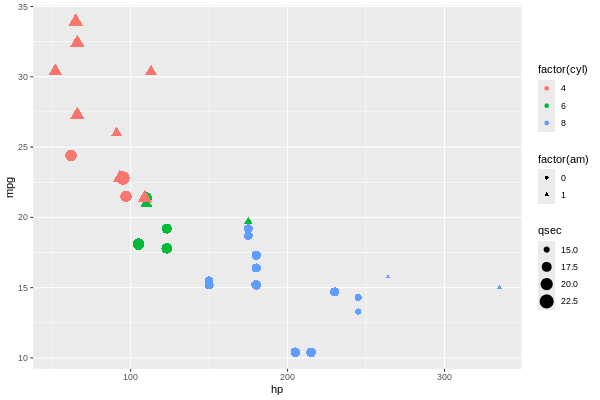

In [9]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = hp, y = mpg,
                          color = factor(cyl),
                          size = qsec,
                          shape = factor(am))) +
 geom_point()

### Bar Charts (`geom_bar`, `geom_col`)

Bar charts are used to display the distribution of a categorical variable or to compare values across categories.

-   `geom_bar()`: Counts the number of observations for each category (default stat = "count").

-   `geom_col()`: Requires x and y aesthetics, where y represents the height of the bars. Use this when you've already pre-computed the counts or sums.

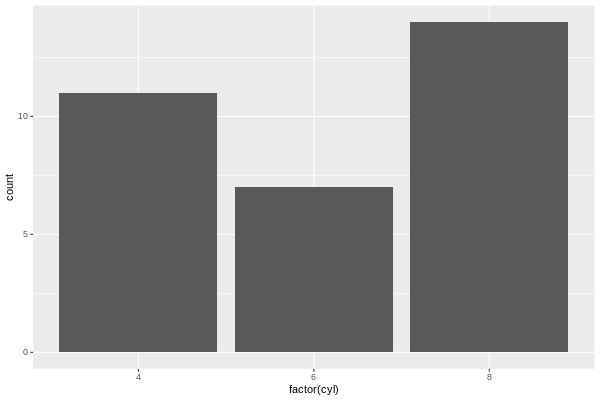

In [10]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = factor(cyl))) +
  geom_bar()

-   When only an `x` aesthetic is provided to `geom_bar()`, it defaults to counting the occurrences of each unique value in `x`.

You can also color the bars by `vs` (engine type: 0 = V-shaped, 1 = straight) to see their distribution within each cylinder group:




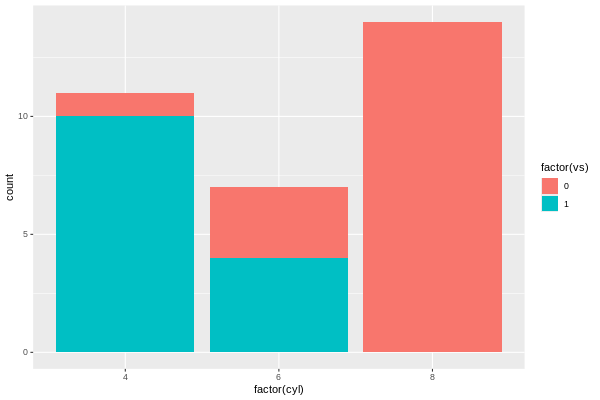

In [12]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = factor(cyl), fill = factor(vs))) +
  geom_bar() # Stacked bar chart

ggplot2 defaults to a stacked bar chart when `fill` is used. You can change this behavior with position argument:

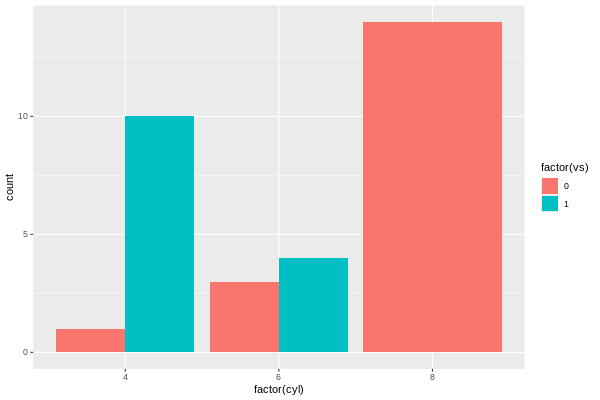

In [13]:
%%R -w 600 -h 400
# Dodged bar chart
ggplot(data = mtcars, aes(x = factor(cyl), fill = factor(vs))) +
  geom_bar(position = "dodge")

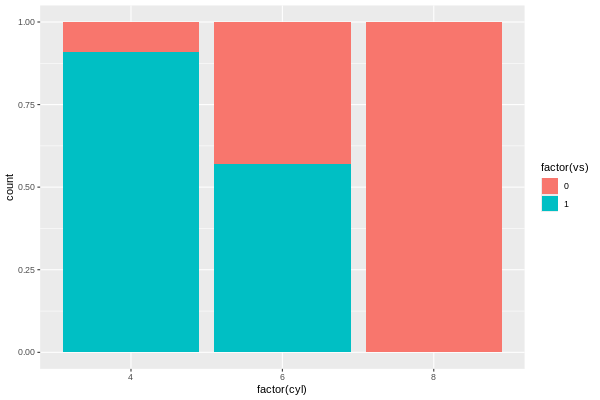

In [15]:
%%R -w 600 -h 400
# Filled bar chart (shows proportions)
ggplot(data = mtcars, aes(x = factor(cyl), fill = factor(vs))) +
  geom_bar(position = "fill")

### Barplot with Error bar

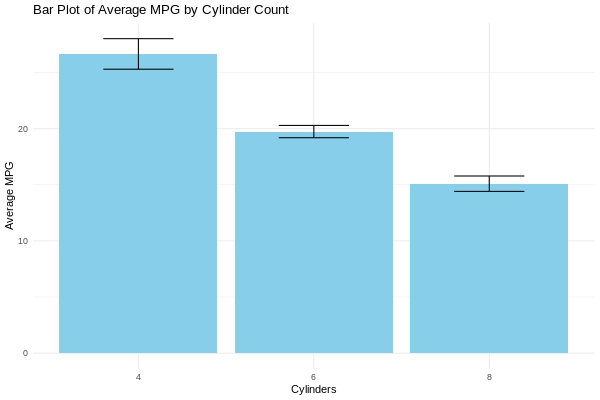

In [16]:
%%R -w 600 -h 400
# Barplot with error bars
bar_plot <- ggplot(data = mtcars, aes(x = factor(cyl), y = mpg)) +
  stat_summary(fun = mean, geom = "bar", fill = "skyblue") +
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.4) +
  labs(title = "Bar Plot of Average MPG by Cylinder Count",
       x = "Cylinders",
       y = "Average MPG") +
  theme_minimal()
print(bar_plot)

### Histograms

To visualize the distribution of a single continuous variable, we use a histogram.




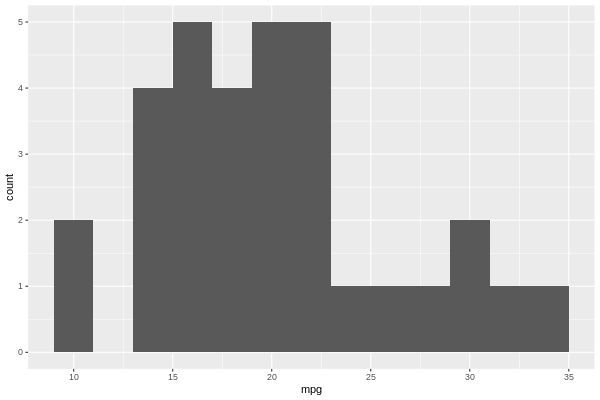

In [17]:
%%R -w 600 -h 400
# Histogram
ggplot(data = mtcars, aes(x = mpg)) +
  geom_histogram(binwidth = 2) # binwidth controls the width of the bins


### Box Plots

Box plots are excellent for showing the distribution of a continuous variable across different categories.

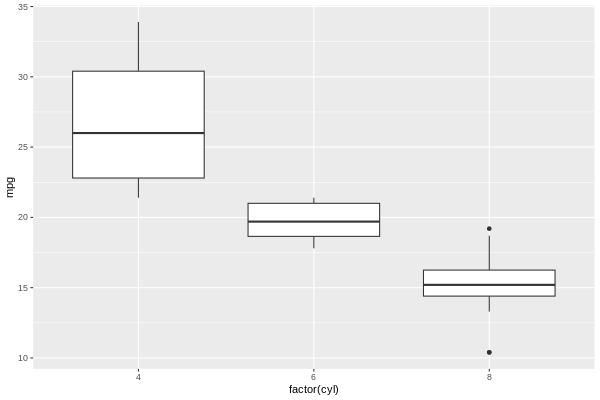

In [18]:
%%R -w 600 -h 400
# Box plot
ggplot(data = mtcars, aes(x = factor(cyl), y = mpg)) +
  geom_boxplot()

We can also add individual data points on top of the box plots for more detail, using geom_jitter to avoid overplotting:

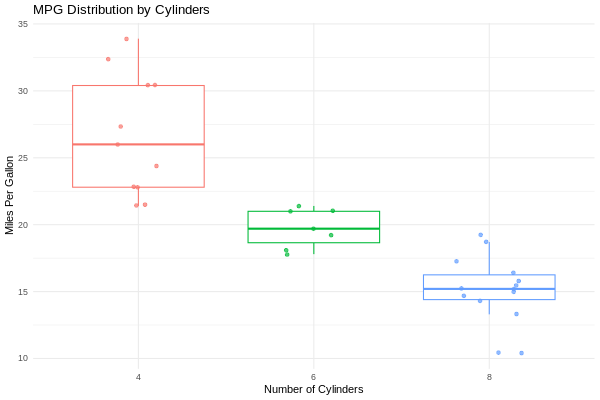

In [19]:
%%R -w 600 -h 400
# Box plot with individual points
ggplot(data = mtcars, aes(x = factor(cyl), y = mpg, color = factor(cyl))) +
  geom_boxplot(outlier.shape = NA) + # Hide default outliers
  geom_jitter(width = 0.2, alpha = 0.7) + # Add jittered points
  labs(title = "MPG Distribution by Cylinders",
       x = "Number of Cylinders",
       y = "Miles Per Gallon") +
  theme_minimal() +
  guides(color = "none") # Remove the redundant color legend

Now will check the duplicates record in the this dat with `get_dupes()` function:

In [ ]:
%%R
mf.04 |> janitor::get_dupes(fips)

# A tibble: 6 × 25
   fips dupe_count region_id state    county         x      y lcb_mortality_rate
  <dbl>      <int> <chr>     <chr>    <chr>      <dbl>  <dbl>              <dbl>
1  1013          2 3         Alabama  Butler C… 8.78e5 1.01e6               38.3
2  1013          2 3         Alabama  Butler C… 8.78e5 1.01e6               38.3
3  1053          2 3         Alabama  Escambia… 8.39e5 9.34e5               58.3
4  1053          2 3         Alabama  Escambia… 8.39e5 9.34e5               58.3
5  5011          2 3         Arkansas Bradley … 3.54e5 1.16e6               69.9
6  5011          2 3         Arkansas Bradley … 3.54e5 1.16e6               69.9
# ℹ 17 more variables: smoking <dbl>, pm_25 <dbl>, no2 <dbl>, so2 <dbl>,
#   ozone <dbl>, pop_65 <dbl>, pop_black <dbl>, pop_hipanic <dbl>,
#   pop_white <dbl>, education <dbl>, poverty_percent <dbl>,
#   income_equality <dbl>, uninsured <dbl>, dem <dbl>, radon_zone_class <fct>,
#   urban_rural <fct>, coal_production <fct>


### Line Plots (geom_line)

Line plots are typically used to show trends over time or ordered categories. Let's use the economics dataset for this.



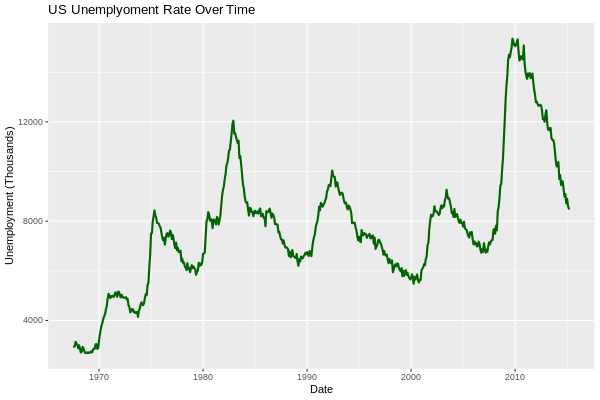

In [21]:
%%R -w 600 -h 400
# load data
data(economics)

ggplot(data = economics, aes(x = date, y = unemploy)) +
  geom_line(color = "darkgreen", size = 1) +
  labs(title = "US Unemplyoment Rate Over Time",
       x = "Date",
       y = "Unemployment (Thousands)")

`geom_smooth()` using formula = 'y ~ x'


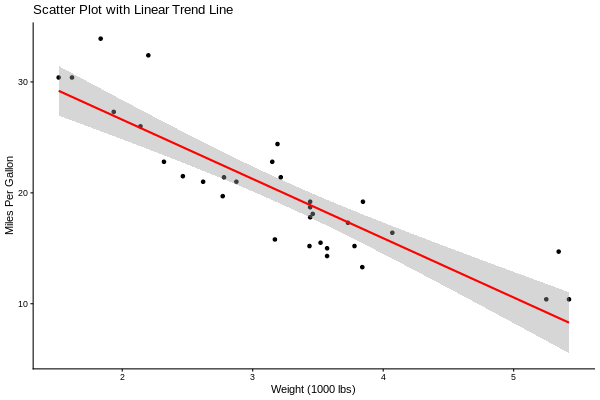

In [22]:
%%R -w 600 -h 400
smooth_plot <- ggplot(data = mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Scatter Plot with Linear Trend Line",
       x = "Weight (1000 lbs)",
       y = "Miles Per Gallon") +
  theme_classic()
print(smooth_plot)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


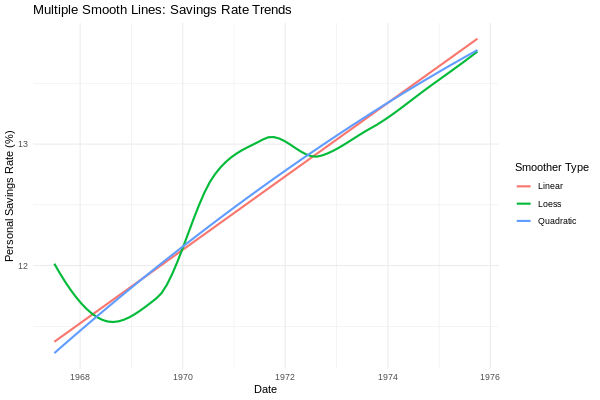

In [23]:
%%R -w 600 -h 400
multi_smooth_plot <- ggplot(data = economics[1:100, ], aes(x = date, y = psavert)) +  # Subset for clarity
  geom_smooth(method = "lm", aes(color = "Linear"), se = FALSE) +
  geom_smooth(method = "loess", aes(color = "Loess"), se = FALSE) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), aes(color = "Quadratic"), se = FALSE) +
  labs(title = "Multiple Smooth Lines: Savings Rate Trends",
       x = "Date",
       y = "Personal Savings Rate (%)",
       color = "Smoother Type") +
  theme_minimal()
print(multi_smooth_plot)

## Customizing Your Plots

### Labels and Titles

Good plots need clear labels and titles.

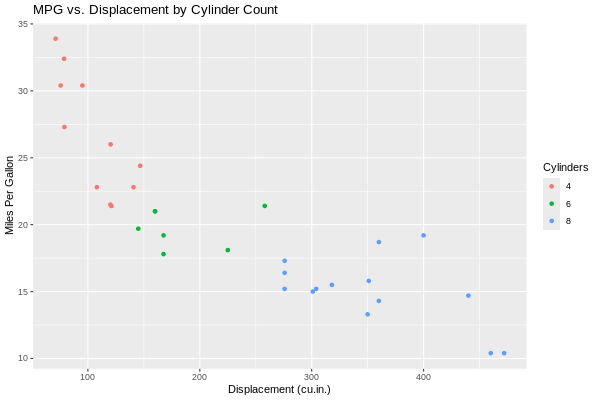

In [24]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = disp, y = mpg, color = factor(cyl))) +
  geom_point() +
  labs(
    title = "MPG vs. Displacement by Cylinder Count",
    x = "Displacement (cu.in.)",
    y = "Miles Per Gallon",
    color = "Cylinders" # Legend title
  )

### Themes

`ggplot2` comes with several built-in themes to quickly change the overall look of your plot.

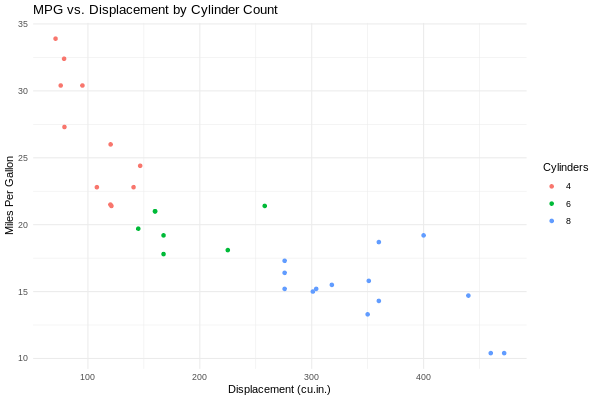

In [25]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = disp, y = mpg, color = factor(cyl))) +
  geom_point() +
  labs(
    title = "MPG vs. Displacement by Cylinder Count",
    x = "Displacement (cu.in.)",
    y = "Miles Per Gallon",
    color = "Cylinders"
  ) +
  theme_minimal() # Or theme_classic(), theme_bw(), theme_dark(), etc.

You can also customize individual elements of a theme using `theme()`.

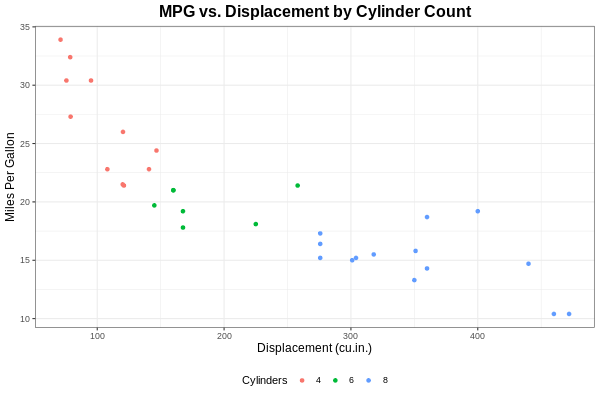

In [26]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = disp, y = mpg, color = factor(cyl))) +
  geom_point() +
  labs(
    title = "MPG vs. Displacement by Cylinder Count",
    x = "Displacement (cu.in.)",
    y = "Miles Per Gallon",
    color = "Cylinders"
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16), # Center title, bold, larger
    axis.title.x = element_text(size = 12),
    axis.title.y = element_text(size = 12),
    legend.position = "bottom" # Move legend to bottom
  )

### Colors and Fills

You can manually set colors or use predefined color scales.

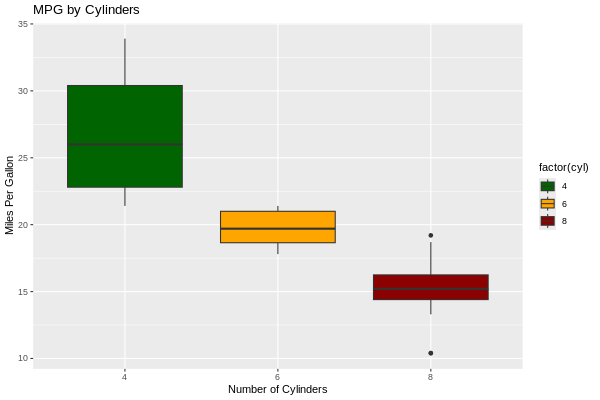

In [27]:
%%R -w 600 -h 400
# Manual colors
ggplot(data = mtcars, aes(x = factor(cyl), y = mpg, fill = factor(cyl))) +
  geom_boxplot() +
  scale_fill_manual(values = c("4" = "darkgreen", "6" = "orange", "8" = "darkred")) +
  labs(title = "MPG by Cylinders", x = "Number of Cylinders", y = "Miles Per Gallon")

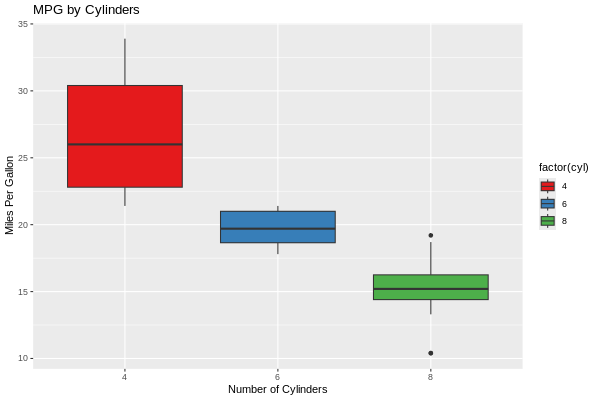

In [28]:
%%R -w 600 -h 400
#install.packages("RColorBrewer")
library(RColorBrewer)

ggplot(data = mtcars, aes(x = factor(cyl), y = mpg, fill = factor(cyl))) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set1") + # Choose a palette name
  labs(title = "MPG by Cylinders", x = "Number of Cylinders", y = "Miles Per Gallon")

### Adjusting Axes

You can set axis limits, breaks, and labels.

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


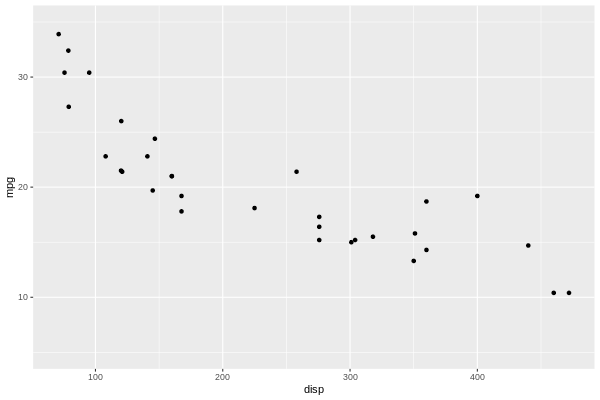

In [30]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = disp, y = mpg)) +
  geom_point() +
  xlim(50, 500) + # Set x-axis limits
  ylim(5, 35) +   # Set y-axis limits
  scale_x_continuous(breaks = seq(100, 400, by = 100)) # Custom breaks for x-axis

## Advanced Plotting Techniques

### Faceting: Small Multiples

Faceting allows you to split your plot into multiple sub-plots based on the levels of one or more categorical variables. This is excellent for comparing distributions across groups.

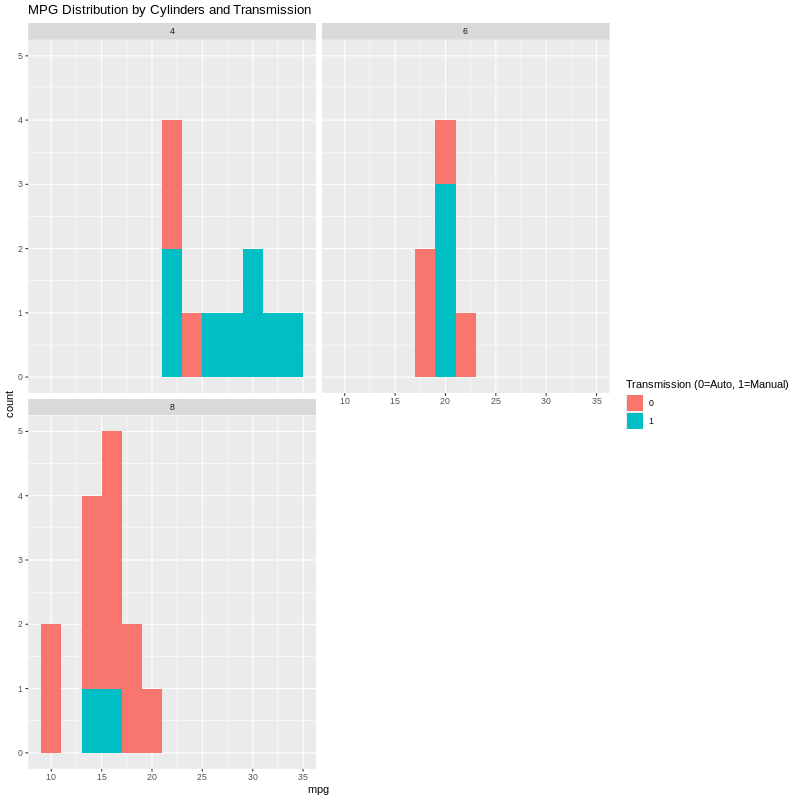

In [32]:
%%R -w 800 -h 800
ggplot(data = mtcars, aes(x = mpg, fill = factor(am))) +
  geom_histogram(binwidth = 2) +
  facet_wrap(~ cyl, ncol = 2) + # Create a grid, 2 columns
  labs(title = "MPG Distribution by Cylinders and Transmission", fill = "Transmission (0=Auto, 1=Manual)")

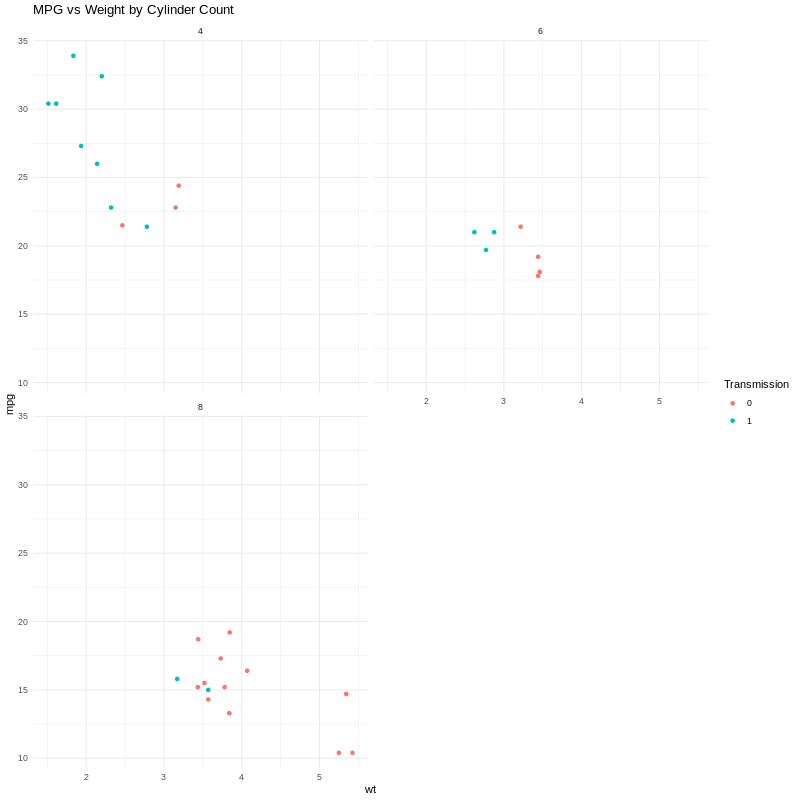

In [33]:
%%R -w 800 -h 800
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point(aes(color = factor(am))) +
  facet_wrap(~ cyl, ncol = 2) +
  labs(title = "MPG vs Weight by Cylinder Count", color = "Transmission") +
  theme_minimal()

### Statistical Transformations (`stat_` functions)

Many `geom_` functions have a default statistical transformation. For instance, `geom_bar()` defaults to `stat_count()`. You can explicitly use `stat_` functions.

Let's plot mean MPG for each cylinder group, with error bars (standard error).

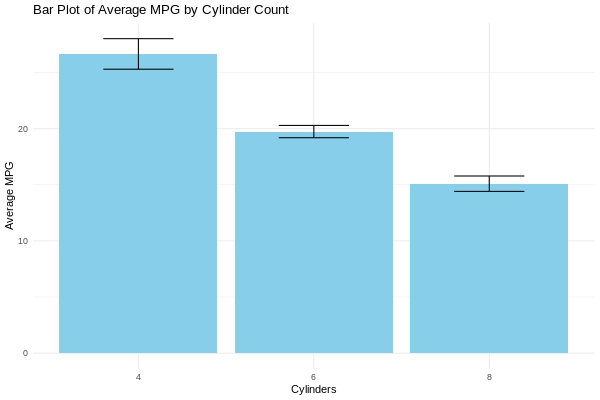

In [34]:
%%R -w 600 -h 400
bar_plot <- ggplot(data = mtcars, aes(x = factor(cyl), y = mpg)) +
  stat_summary(fun = mean, geom = "bar", fill = "skyblue") +
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.4) +
  labs(title = "Bar Plot of Average MPG by Cylinder Count",
       x = "Cylinders",
       y = "Average MPG") +
  theme_minimal()
print(bar_plot)

-   `geom_col()` is used when the y-values are already calculated in your data (unlike `geom_bar()` which calculates counts by default).
-   `geom_errorbar()` adds vertical lines representing the range.


### Scatter Plot With Linear Trend

`geom_smooth()` using formula = 'y ~ x'


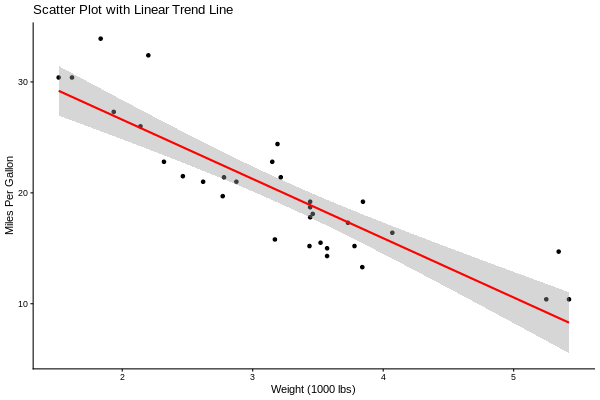

In [35]:
%%R -w 600 -h 400
smooth_plot <- ggplot(data = mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Scatter Plot with Linear Trend Line",
       x = "Weight (1000 lbs)",
       y = "Miles Per Gallon") +
  theme_classic()
print(smooth_plot)

### Combining Geometries

You can layer multiple geometries on top of each other.


`geom_smooth()` using formula = 'y ~ x'


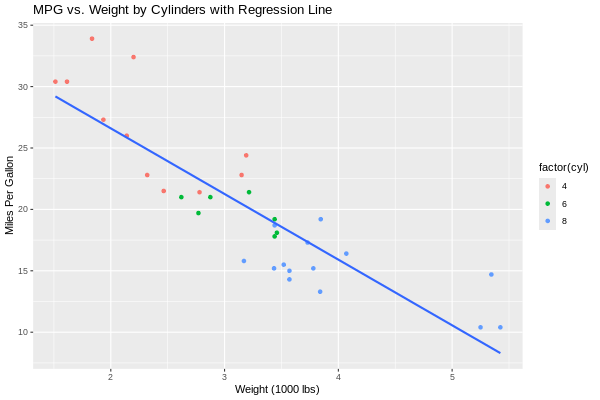

In [36]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = wt, y = mpg)) +
  geom_point(aes(color = factor(cyl))) + # Points colored by cylinders
  geom_smooth(method = "lm", se = FALSE) + # Add a linear regression line, no confidence interval
  labs(title = "MPG vs. Weight by Cylinders with Regression Line", x = "Weight (1000 lbs)", y = "Miles Per Gallon")

`geom_smooth()` using formula = 'y ~ x'


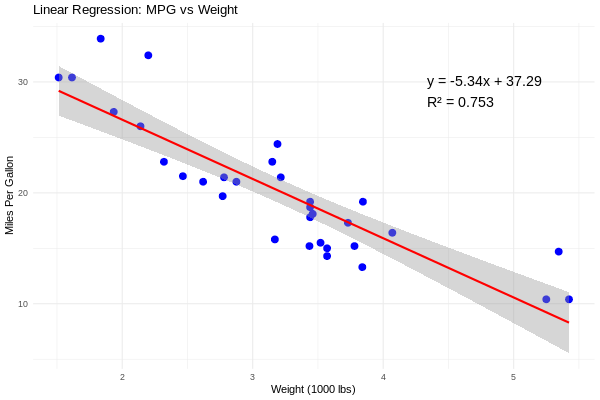

In [37]:
%%R -w 600 -h 400
# Use mtcars dataset
data(mtcars)

# Perform linear regression to get equation and R-squared
lm_model <- lm(mpg ~ wt, data = mtcars)
slope <- round(coef(lm_model)[2], 2)
intercept <- round(coef(lm_model)[1], 2)
r_squared <- round(summary(lm_model)$r.squared, 3)

# Create equation and R-squared text for annotation
eq_text <- paste0("y = ", slope, "x + ", intercept)
r2_text <- paste0("R² = ", r_squared)
annotation_text <- paste(eq_text, r2_text, sep = "\n")

# Create the plot
linear_trend_plot <- ggplot(data = mtcars, aes(x = wt, y = mpg)) +
  geom_point(color = "blue", size = 3) +  # Scatter points
  geom_smooth(method = "lm", color = "red", se = TRUE) +  # Linear trend with confidence interval
  annotate("text", x = max(mtcars$wt) * 0.8, y = max(mtcars$mpg) * 0.9,
           label = annotation_text, hjust = 0, vjust = 1, size = 5) +  # Add equation and R²
  labs(title = "Linear Regression: MPG vs Weight",
       x = "Weight (1000 lbs)",
       y = "Miles Per Gallon") +
  theme_minimal()
print(linear_trend_plot)

### Line Plot with Smooth Line

`geom_smooth()` using formula = 'y ~ x'


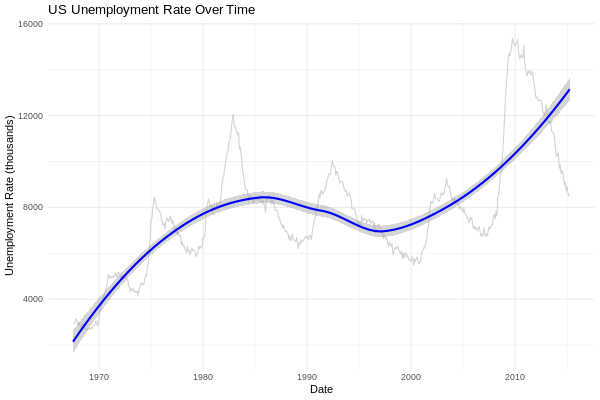

In [38]:
%%R -w 600 -h 400
data(economics)

basic_line_smooth <- ggplot(data = economics, aes(x = date, y = unemploy)) +
  geom_line(color = "gray", alpha = 0.7) +  # Raw line for reference
  geom_smooth(method = "loess", color = "blue", se = TRUE) +  # Smooth line with confidence interval
  labs(title = "US Unemployment Rate Over Time",
       x = "Date",
       y = "Unemployment Rate (thousands)") +
  theme_minimal()
print(basic_line_smooth)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


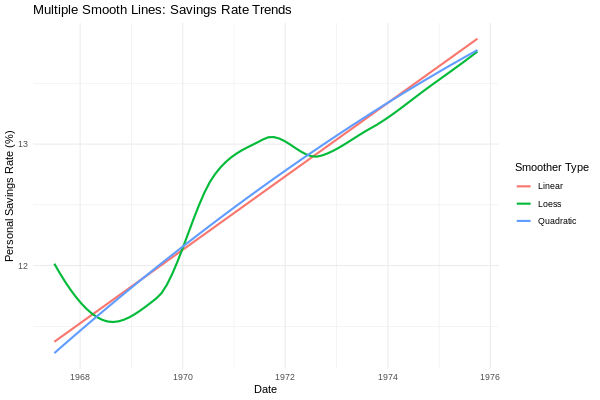

In [39]:
%%R -w 600 -h 400
# Example with multiple smoothers (no points/lines for clarity)
multi_smooth_plot <- ggplot(data = economics[1:100, ], aes(x = date, y = psavert)) +  # Subset for clarity
  geom_smooth(method = "lm", aes(color = "Linear"), se = FALSE) +
  geom_smooth(method = "loess", aes(color = "Loess"), se = FALSE) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), aes(color = "Quadratic"), se = FALSE) +
  labs(title = "Multiple Smooth Lines: Savings Rate Trends",
       x = "Date",
       y = "Personal Savings Rate (%)",
       color = "Smoother Type") +
  theme_minimal()
print(multi_smooth_plot)

### Annotations

You can add text labels, arrows, or lines to highlight specific points or regions.

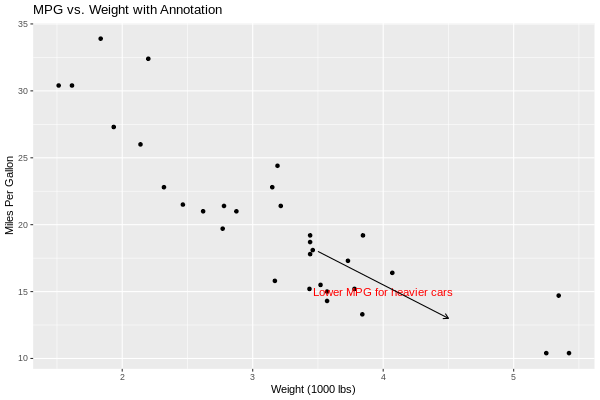

In [40]:
%%R -w 600 -h 400
ggplot(data = mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  annotate("text", x = 4, y = 15, label = "Lower MPG for heavier cars", color = "red", size = 4) +
  annotate("segment", x = 3.5, y = 18, xend = 4.5, yend = 13, arrow = arrow(length = unit(0.2, "cm"))) +
  labs(title = "MPG vs. Weight with Annotation", x = "Weight (1000 lbs)", y = "Miles Per Gallon")

### Working with Dates and Time Series

Attaching package: ‘lubridate’



    date, intersect, setdiff, union




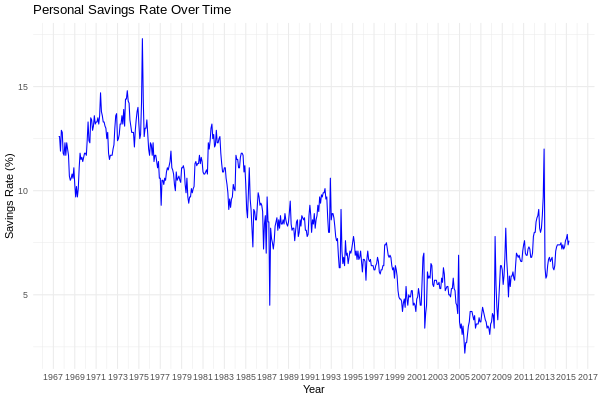

In [42]:
%%R -w 600 -h 400
library(lubridate)

# Use economics data
ggplot(ggplot2::economics, aes(x = date, y = psavert)) +
  geom_line(color = "blue") +
  scale_x_date(date_breaks = "2 years", date_labels = "%Y") +
  labs(title = "Personal Savings Rate Over Time", x = "Year", y = "Savings Rate (%)") +
  theme_minimal()

### Dual Y-Axis

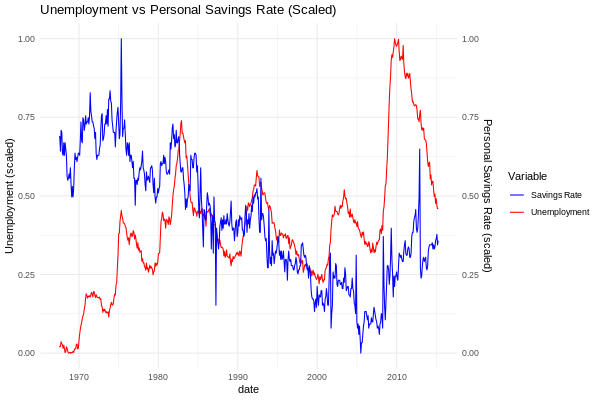

In [43]:
%%R -w 600 -h 400

# Normalize two variables to [0,1] for dual axis
econ <- ggplot2::economics %>%
  mutate(
    unemploy_scaled = (unemploy - min(unemploy)) / diff(range(unemploy)),
    psavert_scaled = (psavert - min(psavert)) / diff(range(psavert))
  )

ggplot(econ, aes(x = date)) +
  geom_line(aes(y = unemploy_scaled, color = "Unemployment")) +
  geom_line(aes(y = psavert_scaled, color = "Savings Rate")) +
  scale_color_manual(values = c("Unemployment" = "red", "Savings Rate" = "blue")) +
  scale_y_continuous(
    name = "Unemployment (scaled)",
    sec.axis = sec_axis(~., name = "Personal Savings Rate (scaled)")
  ) +
  labs(title = "Unemployment vs Personal Savings Rate (Scaled)", color = "Variable") +
  theme_minimal()

### Layering Multiple Geoms

Combine different plot types in one.

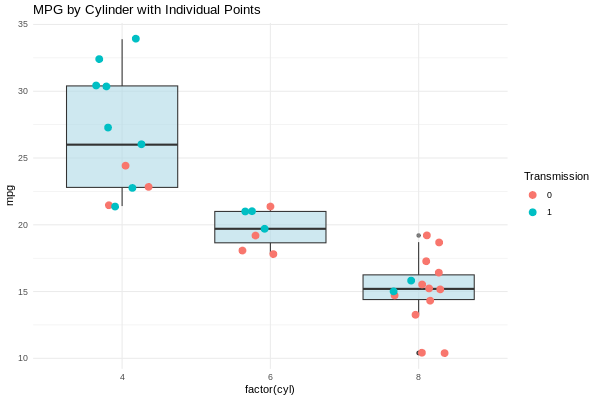

In [44]:
%%R -w 600 -h 400
ggplot(mtcars, aes(x = factor(cyl), y = mpg)) +
  geom_boxplot(fill = "lightblue", alpha = 0.6) +
  geom_jitter(width = 0.2, aes(color = factor(am)), size = 3) +
  labs(title = "MPG by Cylinder with Individual Points", color = "Transmission") +
  theme_minimal()

## Combining Plots with `patchwork`

Install `patchwork` for easy subplot layouts.

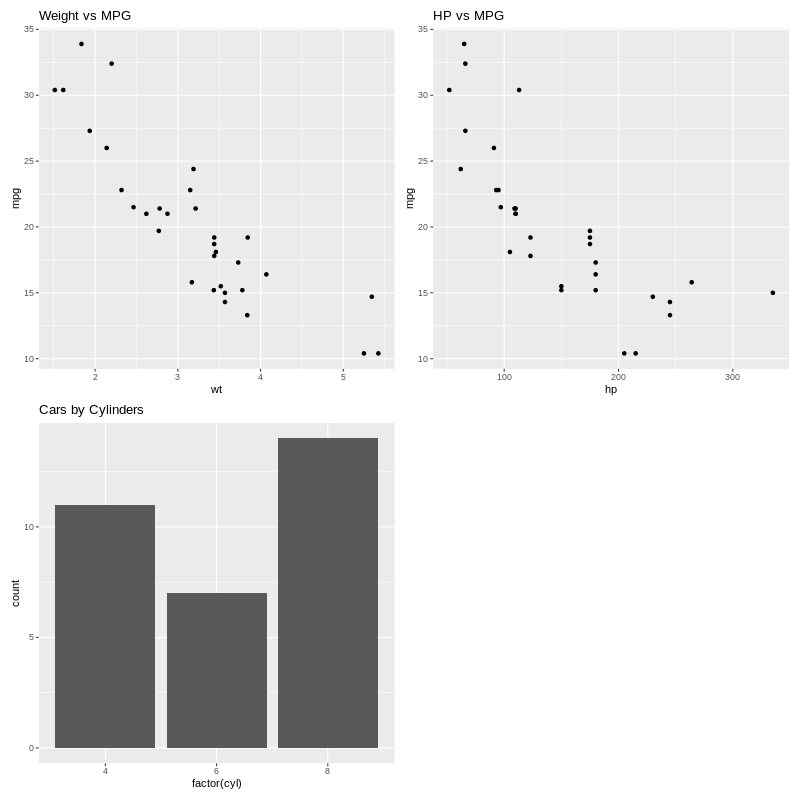

In [45]:
%%R -w 800 -h 800

library(patchwork)

p1 <- ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point() + ggtitle("Weight vs MPG")
p2 <- ggplot(mtcars, aes(x = hp, y = mpg)) + geom_point() + ggtitle("HP vs MPG")
p3 <- ggplot(mtcars, aes(x = factor(cyl))) + geom_bar() + ggtitle("Cars by Cylinders")

# Arrange plots
(p1 + p2) / p3  # top row: p1 and p2; bottom: p3

# Or use plot_layout
p1 + p2 + p3 + plot_layout(ncol = 2)

### Coordinate Systems

Flip axes or use polar coordinates.


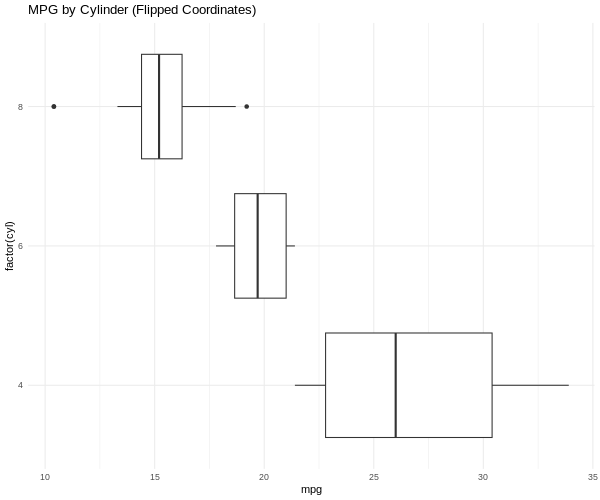

In [48]:
%%R -w 600 -h 500
# Flip axes
ggplot(mtcars, aes(x = factor(cyl), y = mpg)) +
  geom_boxplot() +
  coord_flip() +
  labs(title = "MPG by Cylinder (Flipped Coordinates)") +
  theme_minimal()


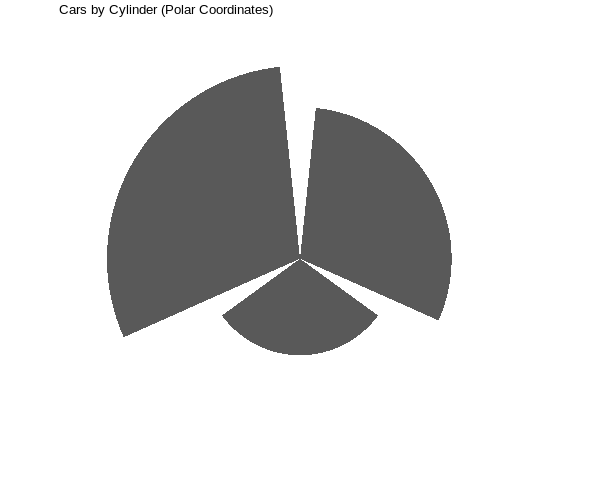

In [49]:
%%R -w 600 -h 500
# Polar plot (example: bar plot in polar)
ggplot(mtcars, aes(x = factor(cyl))) +
  geom_bar() +
  coord_polar() +
  labs(title = "Cars by Cylinder (Polar Coordinates)") +
  theme_void()

## Extensions: `ggrepel`, `gganimate`, `ggthemes`

### Avoid overlapping text with `ggrepel`

In [ ]:
%%R
install.packages("ggrepel", lib='drive/My Drive/R/')

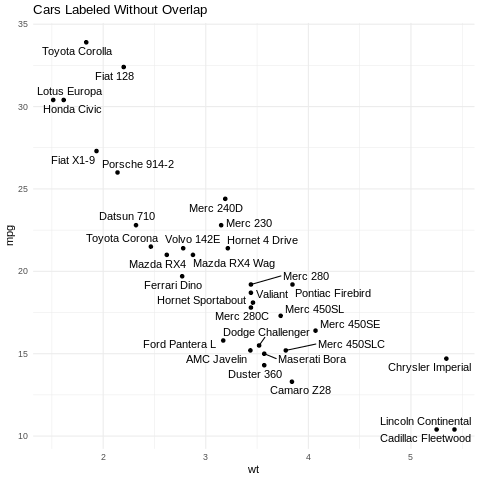

In [51]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(ggrepel)

ggplot(mtcars, aes(x = wt, y = mpg, label = rownames(mtcars))) +
  geom_point() +
  geom_text_repel() +
  labs(title = "Cars Labeled Without Overlap") +
  theme_minimal()

## Saving Plots

You can save your plots to various file formats using `ggsave()`.

In [ ]:
%%R
my_plot <- ggplot(data = mtcars, aes(x = disp, y = mpg, color = factor(cyl))) +
  geom_point() +
  labs(title = "MPG vs. Displacement", x = "Displacement", y = "MPG")

ggsave("my_scatter_plot.png", plot = my_plot, width = 7, height = 5, dpi = 300)
# You can specify .pdf, .jpeg, .tiff, etc.

## Pro Tips & Best Practices

-   Always start with `ggplot(data, aes(...))`\
-   Use `aes()` for mappings that vary with data (color, size, shape)\
-   Use fixed values outside `aes()` (e.g., `color = "red"`)\
-   Layer geoms logically — background first, annotations last\
-   Use `labs()` for clear titles and axis labels\
-   Choose themes that reduce clutter: `theme_minimal()`, `theme_bw()`\
-   Avoid dual axes unless absolutely necessary and clearly labeled\
-   Save plots with `ggsave()`:

## Summary and Conclusions

This tutorial covers `ggplot2` in R, from basic to advanced plotting using the `mtcars` and `economics` datasets. It starts with simple scatter plots, introducing `ggplot()`, `aes()`, and `geom_point()`. Aesthetics like color and size encode variables, while faceting splits plots by categories. Trend lines (`geom_smooth()`) show linear and loess fits. Bar plots and boxplots summarize distributions, and advanced techniques include custom themes, multiple geoms, polar coordinates, and saving plots with `ggsave()`. A final example adds a linear regression line with its equation and R-squared displayed.

`ggplot2` is a versatile tool for creating insightful visualizations in R. This tutorial demonstrates its flexibility, from basic scatter and line plots to complex, customized graphics. Users can leverage aesthetics, faceting, and statistical overlays for professional plots. Explore `scale_*`, `coord_*`, or packages like `ggthemes` and `plotly` for further customization and interactivity, enabling effective data exploration and presentation.


## Resources

1.  [ggplot2 Documentation](https://ggplot2.tidyverse.org/)

2.  “R for Data Science” by Hadley Wickham — Chapter 3 on Data Visualization

3 `ggplot2` extensions gallery: https://exts.ggplot2.tidyverse.org/gallery/